# World Happiness Score 2021-2022: a Data and Statistical Analysis 
## Table of Contents
* [Introduction](#section-1)
* [Ask](#section-2)
* [Prepare](#section-3)
* [Process](#section-4)
* [Analyze](#section-5)
* [Share](#section-6)
* [Act](#section-7)

<a id="section-1"></a>
# Introduction
The world has been suffered from Covid-19 for quite a long time, and it is interesting to ask and study the 2021-22 happiness scores of each country under this rare situation. The world happiness report is essential for government as it provides information that is hard to observe in reality. For instance, the ladder score could indicate if a government’s policy is beneficial to citizens. Psychologists, economists, and health providers have described how the use of happiness score could guide a government in future decision making. Hence, with today’s scenario, it is more than necessary to study and analyze the data.

The data set is retrieved from kaggle.com. but at the same time, the happiness scores and rankings are collected from the Gallup World Poll. There are six factors — economic production, social support, life expectancy, freedom, absence of corruption, and generosity —that have a correlation with each country’s happiness score. With scale from 0 to 10, 149 countries happiness scores are included.

According to world happiness official website, “the use of subjective measurements of wellbeing is meant to be a bottom-up approach which emancipates respondents to evaluate their own wellbeing.” This indicates the fact that respondents apply their first-person perspective while produce a ladder score. 

* **Ladder score**: Happiness score or subjective well-being. This is the national average response to the question of life evaluations.
* **Logged GDP per capita**: The GDP-per-capita time series from 2019 to 2020 using countryspecific forecasts of real GDP growth in 2020.
* **Social support**: Social support refers to assistance or support provided by members of social networks to an individual.
* **Healthy life expectancy**: Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year.
* **Freedom to make life choices**: Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” ... It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked.
* **Generosity**: Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.
* **Perceptions of corruption**: The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”
* **Ladder score in Dystopia**: It has values equal to the world’s lowest national averages. Dystopia as a benchmark against which to compare contributions from each of the six factors. Dystopia is an imaginary country that has the world's least-happy people. ... Since life would be very unpleasant in a country with the world's lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia.


<a id="section-2"></a>
## Ask
1. What topic are we exploring? 

   World Happiness score from 2021 and 2022. Factors that account for the score.
2. What is the problem we are trying to solve?

   How do factors affect the happiness score differently?
   Do scores change drastically from 2021 to 2022? In the post COVID-19 period?
3. What metrics will we use to measure your data to achieve our objective?

   
4. Who are the stakeholders?

   The stakeholders will be world leaders and charitable institutions that want to make the world a better place.
5. Who is the audience?

   Citizens of the world. Philanthropists and world leaders who could make a change on world happiness.
6. My hypothesis
    
   All factors affect the happiness score. But 'Generosity' affects the score the least.
   The score does not change drastically from 2021 to 2022.

<a id="section-3"></a>
## Prepare

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
import os
from scipy import stats
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv
/kaggle/input/world-happiness-report-2022/World Happiness Report 2022.csv


In [2]:
data2021 = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv")
data2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
data2021['Ladder score'].describe()

count    149.000000
mean       5.532839
std        1.073924
min        2.523000
25%        4.852000
50%        5.534000
75%        6.255000
max        7.842000
Name: Ladder score, dtype: float64

In [4]:
data2021.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

Add a rank column to better check out the ranking.

In [5]:
data2021.insert(loc=0, column="RANK", value=range(1, len(data2021)+1))
data2021

,RANK,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,1,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,...,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,2,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,...,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,3,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,...,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,4,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,...,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,5,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,...,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,...,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,146,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,...,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,147,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,...,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,148,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,...,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


<AxesSubplot:xlabel='Ladder score', ylabel='Density'>

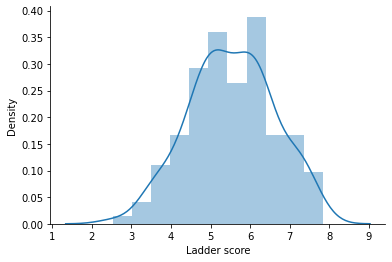

In [6]:
sns.distplot(data2021['Ladder score'])

In [7]:
data2022 = pd.read_csv("../input/world-happiness-report-2022/World Happiness Report 2022.csv")
data2022

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,Botswana*,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102
142,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034


In [8]:
data2022.isnull().sum()

RANK                                          0
Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
dtype: int64

<AxesSubplot:xlabel='Happiness score', ylabel='Density'>

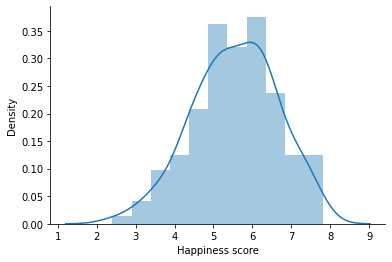

In [9]:
sns.distplot(data2022['Happiness score'])

We've briefly checked out the world happiness 2021 and 2022 datasets. The first impression of the two datasets is that the distribution of the Ladder Score of both years look normally distributed. In 2022, it seems to have more countries that score between 5-7 seem than 2021.

The first dataset, namely the world happiness 2021, is composed of 149 countries and 21 metrics; whereas the world happiness 2022 dataset contains 146 countries and 12 metrics. There are some metrics that are not included in the wolrd happiness 2022 dataset but the important metrics are included. The source of the data is credible as it is collected through the official world happiness report website.

<a id='section-4'></a>
## Process

Now let's clean the two dataset for clean analysis! I've also used Google WorkSheet to also check for anomalies, such as Null values, unexpected type value, and etc. However, I need to rename the columns name through Python to clean the dataset and make it more organized.

In [10]:
data2021 = data2021.rename(columns={'Country name':'Country','Regional indicator': 'Region','Ladder score':'Ladder Score',
                                'upperwhisker':'Whisker-high','lowerwhisker':'Whisker-low'})

In [11]:
data2021 = data2021.loc[:,~data2021.columns.duplicated(keep='last')]

In [12]:
data2021

,RANK,Country,Region,Ladder Score,Standard error of ladder score,Whisker-high,Whisker-low,Logged GDP per capita,Social support,Healthy life expectancy,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,1,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,...,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,2,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,...,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,3,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,...,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,4,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,...,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,5,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,...,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,...,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,146,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,...,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,147,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,...,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,148,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,...,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [13]:
data2022 = data2022.rename(columns={'RANK':'RANK','Happiness score':'Ladder Score'})

In [14]:
data2022

,RANK,Country,Ladder Score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,Botswana*,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102
142,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034


<a id='section-5'></a>
## Analyze

Since there are a lot of factors that could influence the high and low of happiness score, it is beneficial to first be familiarized the properties of happiness scores. With a total count of 149 countries, the average or mean of all happiness scores is about 5.532839. Finland has the highest score of 7.842, and Afghanistan has the lowest score of 2.523. More than 30 countries have the score above 6.255, and more than 30 counties reach the happiness score below 4.85. The median and mean are very close as the difference between them is only 5.534 - 5.5328. Hence, it is intuitive to say that the distribution of ladder scores all over the world behaves almost normally. 


In [15]:
fig = px.choropleth(data_frame=data2021,
                    locations="Country",
                    locationmode="country names",
                    color="Ladder Score",
                    range_color=(0,9),
                     color_continuous_scale='Hot',
                    title="Happiness/Ladder Score Map 2021")
fig.show()

In [16]:
fig = px.choropleth(data_frame=data2022,
                    locations="Country",
                    locationmode="country names",
                    color="Ladder Score",
                    color_continuous_scale="Viridis",
                    range_color=(0,9),
                    title="Happiness/Ladder Score Map 2022")
fig.show()

<Figure size 720x360 with 0 Axes>

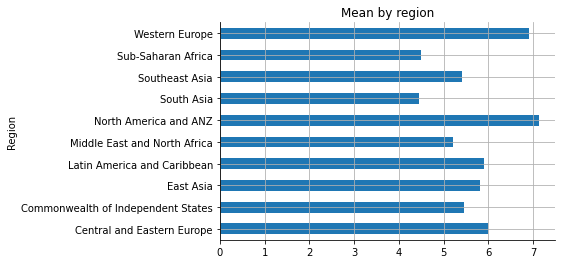

<Figure size 720x360 with 0 Axes>

In [17]:
mean_by_region = data2021.groupby('Region').agg({'Ladder Score': 'mean'})
mean_by_region.plot.barh(legend=False, title='Mean by region', grid=True)
plt.figure(figsize=(10,5))

Though the ladder scores behave approximately like a bell shape, does the fact hold for all regions? For example, do the ladder scores normally distribute in Asia, Europe, Africa, and so on in the same way? 

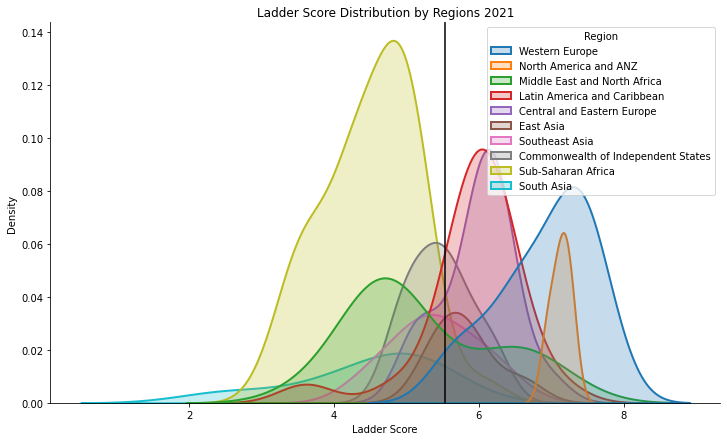

In [18]:
plt.figure(figsize = (12,7))
sns.kdeplot(data2021["Ladder Score"], hue = data2021["Region"], fill = True, linewidth = 2)
plt.axvline(data2021["Ladder Score"].mean(), c = "black")
plt.title("Ladder Score Distribution by Regions 2021")
plt.show()

<AxesSubplot:xlabel='Ladder Score', ylabel='Region'>

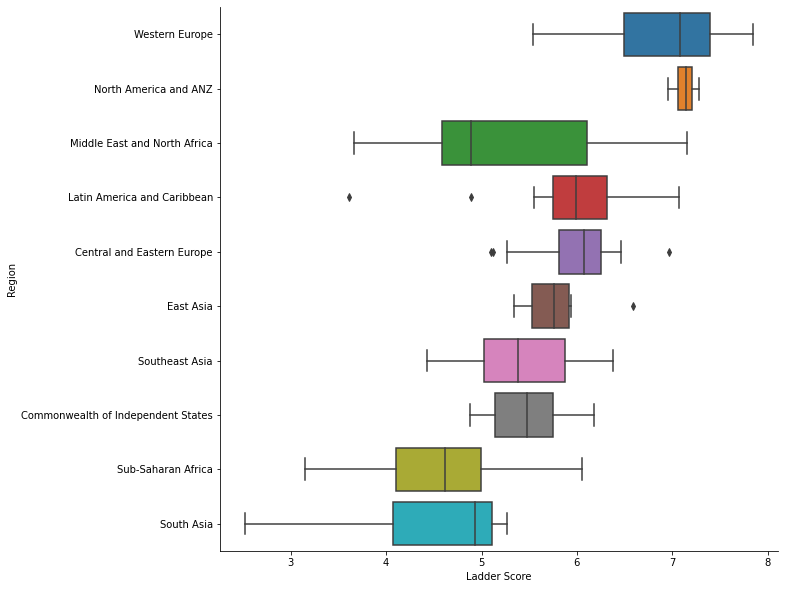

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(y="Region", x="Ladder Score", data=data2021, orient="h", ax=ax)

With the above image, we find out that North America and ANZ gives the most weight with the highest mean about 7.1. South Asia and Sub-Saharan Africa reach the lowest average mean about 4.5. The below graph is more obvious to see that not every region has an almost bell shaped normal distribution of happiness scores. Only in the relatively more developed regions, like North America and Western Europe, do the happiness score distribute normally. There are significant differences in mean between Asian countries and EU. In some regions, there are also outliers, which could be due to the any of the six factors mentioned above.

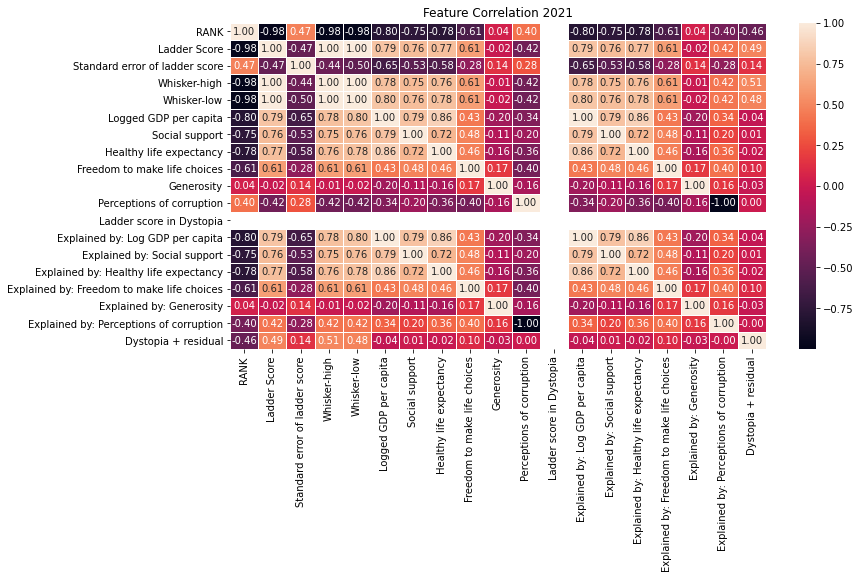

In [20]:
plt.figure(figsize = (12, 6))
sns.heatmap(data2021.corr(), annot = True, fmt = '.2f', linewidth = 0.7)
plt.title("Feature Correlation 2021")
plt.show()

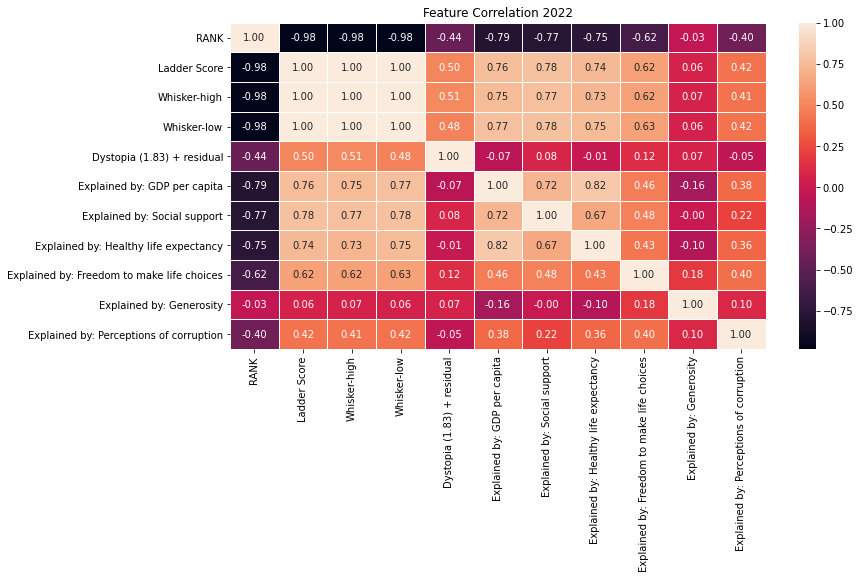

In [21]:
plt.figure(figsize = (12, 6))
sns.heatmap(data2022.corr(), annot = True, fmt = '.2f', linewidth = 0.7)
plt.title("Feature Correlation 2022")
plt.show()

In [22]:
2022

2022

Since any of the six factors could have played a huge role, we want to compare how much each one of the features contributes to the ladder score. Before finding out the linear regression between the ladder score 
and the relatively more influential factor, let’s first check out the correlations.

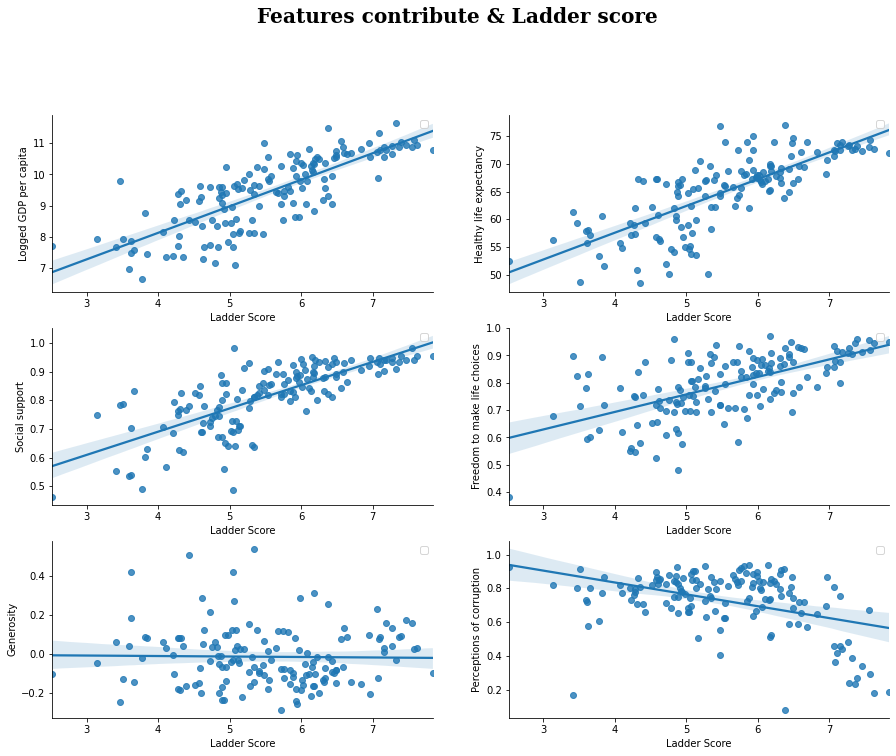

In [23]:
df=data2021[['Country', 'Region', 'Ladder Score',
        'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]
cols=df.corr()['Ladder Score'].sort_values(ascending=False)
fig=plt.figure(figsize=(15,15))
plt.suptitle("Features contribute & Ladder score",family='Serif', weight='bold', size=20)
j=0
for i in cols.index[1:]:
    
    ax=plt.subplot(421+j)
    ax=sns.regplot(data=df, x='Ladder Score',y=i)
    ax.legend('')
    j=j+1
    
plt.legend('')

In [24]:
X = data2021['Ladder Score'].values
Y= data2021['Logged GDP per capita'].values
mean_X =np.mean(X)
mean_Y =np.mean(Y)
total_num = len(X)
numerator = 0
denominator =0
for i in range(total_num):
    numerator += (X[i] - mean_X)*(Y[i] - mean_Y)
    denominator += (X[i] - mean_X)**2
beta_1 = numerator/denominator
beta_0 = mean_Y - beta_1*mean_X
print(beta_1,beta_0) 

0.852031519562915 4.718054895925973


From the above regression graphs, we could see that only Generosity plays less of a role in deciding the high and low of the happiness score because the slope is horizontal and many points do not stay close to the line. Now, we want to find out the linear regression relationship between the ladder scores and logged GDP per capita, as it looks like all the points are close to the positive slope. To find out beta0 and beta1 that minimize residue for regression, we apply theorem 13.4. First, calculating the mean of ladder scores and logged GDP per capita. Second, sum up the product of the difference between each ladder score and the mean ladder score and the difference between each logged GDP per capita and average logged GDP per capita. Divide this sum by sum of difference squared. We get beta1. Finally, we get beta0 by calculating the average mean score minus beta1 times average life expectancy. Codes and equations: r(x) = 0.852031519562915 * x + 4.718054895925973 

In [25]:
from scipy.stats import pearsonr

r, p = pearsonr(data2021['Ladder Score'], data2021['Freedom to make life choices'])
print(f'p_val = {p}\ncorr = {r}')  

p_val = 2.0545739416713014e-16
corr = 0.6077530656580242


In [26]:
from scipy.stats import shapiro
shapiro(data2021['Ladder Score'])

ShapiroResult(statistic=0.9912543892860413, pvalue=0.4894075393676758)

In the summary statistics section, we have already seen that the distribution of ladder scores behaves normally. To view it more vividly, we can use sns package from python and see the distribution.

Although we are able to observe that the ladder score is normally distributed, the size of the dataset is actually limiting. That is, we only have 149 countries being considered in the analysis. We know that the distribution for height of male is normal, but the height distribution has a large sample size. Therefore, we have to apply normality tests to deduce whether the data have been sampled from a distribution. 

A normality test will determine whether a dataset deviates from the expectations of the normal distribution. There are several normality tests, like D’Agostino-Pearson omnibus, Shapiro-Wilk, and Kolmogorov-Smirv tests. They are all different but they all have the application of hypothesis testing. The null hypothesis H0 would be: data are sampled from a set that follows a normal distribution. (when p-val>0.05). The alternative hypothesis Ha would be: data are not sampled from a set that follows a normal distribution. (p-val <= 0.5)


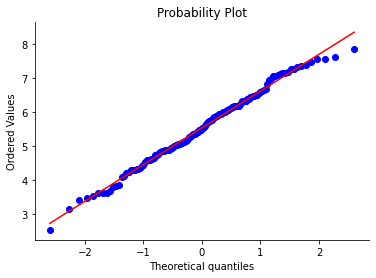

In [27]:
import pylab
import scipy.stats as stats
measurements = (data2021['Ladder Score'])
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

However, we could also use python to find out the p-val, which is approximately 0.489. Since the p-val is greater than 0.05, we do not reject the null hypothesis and conclude that the data are sampled from a set that follows a normal distribution. 
In the case of Shapiro, the test may not work properly if the set has many equal happiness score. The test rarely rejects the null hypothesis when the sample size n is small. When n is large, the test reject null for negligible difference from the mean. And as always, large p-value does not prove the distribution is normal. The solution to this would be to conduct Q-Q plot, quantile quantile plot. Actual data is on the y-axis, and expected and theoretical quantiles are on x-axis. Since the slope of the line represents the standard deviation, the standard deviation is constant and hence a normal distribution for ladder score. This slope squared is the numerator in the test statistic of Shapiro test as well.

<a id='section-6'></a>
## Share
Another presentation (PPT) will be created and will be different from this report.

<a id='section-7'></a>
## Act

## Reference
**World Happiness Report Official Website**: https://worldhappiness.report/